## Simple Neural Network from scratch

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Logistic regression

In [2]:
ds = np.loadtxt('linpts.txt')
data = pd.DataFrame(ds, columns=['x1', 'x2', 'y'])
data.head()

x1     x2    y
0  0.658  1.570  1.0
1  0.676  1.185  1.0
2 -0.084  0.343  0.0
3  1.019  0.956  1.0
4  0.853  0.901  1.0

<AxesSubplot:xlabel='x1', ylabel='x2'>

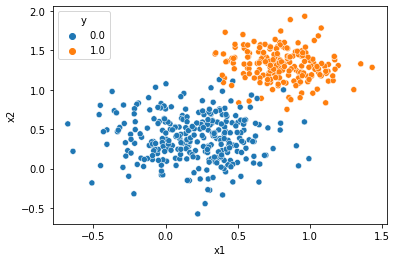

In [6]:
sns.scatterplot(x='x1', y='x2', hue='y', data=data)

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0, 0, 1]]).T

ds = np.concatenate((X, y), axis=1)
df = pd.DataFrame(ds, columns=['A', 'B', 'y'])
df

A  B  y
0  0  0  1
1  0  1  0
2  1  0  0
3  1  1  1

<AxesSubplot:xlabel='A', ylabel='B'>

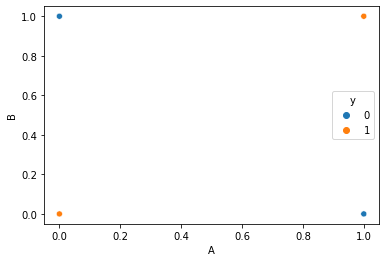

In [8]:
sns.scatterplot(x='A', y='B', hue='y', data=df)

In [15]:
class LogisticRegressor: 
    def __init__(self, m, alpha):
        self.m = m
        self.alpha = alpha
        self.w = np.random.normal(0, 1, 3)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def hypothesis_fn(self, feature):
        z = self.w @ feature.T
        return self.sigmoid(z)

    def loss_fn(self, y, pred_y):
        loss = -np.sum(y * np.log2(pred_y) + (1 - y) * np.log2((1 - pred_y))) / self.m
        return loss

    def gradient_fn(self, X, y):
        w_prime = X.T @ (self.hypothesis_fn(X) - y) / self.m
        return w_prime
        

    def predict(self):
        pass

    def fit(self, epoch, features, target):
        loss_lst = []
        bias = np.expand_dims(np.ones(self.m), axis=0).T
        features = np.concatenate((features, bias), axis=1)
        for i in range(epoch):
            pred_y = self.hypothesis_fn(features)
            loss = self.loss_fn(target, pred_y)

            w_prime = self.gradient_fn(features, target)

            self.w = self.w - self.alpha * w_prime

            loss_lst.append(loss)

        return self.w , loss_lst


[1.0000000083713454, 1.0000000083057865, 1.000000008240741, 1.0000000081762046, 1.000000008112174, 1.0000000080486444, 1.0000000079856126, 1.0000000079230746, 1.000000007861026, 1.0000000077994635]
[-0.00028548 -0.0002811   0.00033603]


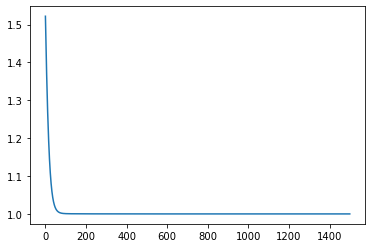

In [34]:
epoch = 1500
m = len(df)
alpha = 0.1

logistic_reg = LogisticRegressor(m=m, alpha=alpha)
w, loss_lst = logistic_reg.fit(epoch, np.array(df.iloc[:, :-1]), df.iloc[:, -1])

plt.plot(loss_lst)
print(loss_lst[-10:])
print(w)

slope: -1.015582927737128
intercept: -1.1953824345085926


<AxesSubplot:xlabel='A', ylabel='B'>

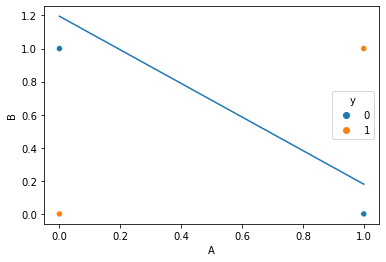

In [35]:
# z = w1x1 + w2x2 + b

y = lambda x: -w[0]/w[1] * x - w[2]/w[1]

print(f"slope: {-w[0]/w[1]}")
print(f"intercept: {w[2]/w[1]}")

plt.plot(np.linspace(0,1), y(np.linspace(0, 1)))
sns.scatterplot(x='A', y='B', hue='y', data=df)

[0.07232304326483237, 0.07230686109899899, 0.07229069824327473, 0.07227455466202537, 0.07225843031970618, 0.07224232518086168, 0.07222623921012541, 0.07221017237221952, 0.07219412463195449, 0.072178095954229]
[ 4.93395985  7.10628586 -9.20255671]


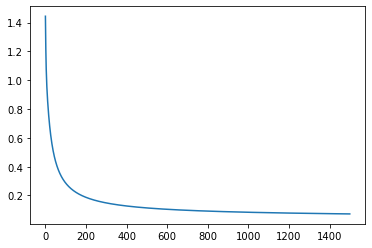

In [36]:
epoch = 1500
m = len(data)
alpha = 0.5

logistic_reg = LogisticRegressor(m=m, alpha=alpha)
w, loss_lst = logistic_reg.fit(epoch, np.array(data.iloc[:, :-1]), np.array(data.iloc[:, -1]))

plt.plot(loss_lst)
print(loss_lst[-10:])
print(w)

slope: -0.6943092275700726
intercept: -1.2949882530746784


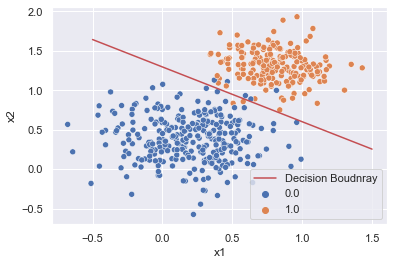

In [40]:
# z = w1x1 + w2x2 + b ---> m = -w1/w2 , b = -b/w2 in y = mx+b
sns.set_theme()

y = lambda x: -w[0]/w[1] * x - w[2]/w[1]

print(f"slope: {-w[0]/w[1]}")
print(f"intercept: {w[2]/w[1]}")

plt.plot(np.linspace(-0.5, 1.5), y(np.linspace(-0.5, 1.5)), label='Decision Boudnray', color='r')
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.legend()

### Neural Network from scratch

In [ ]:
# pytorch / tensorflow 
# scipy 

In [42]:
class NeuralNetwork(LogisticRegressor):
    def __init__(self, m, alpha) -> None:
        super(NeuralNetwork, self).__init__(m, alpha)
        self.m = m
        self.alpha = alpha

        self.W1 = np.random.normal(0, 1, (2, 2))
        self.W2 = np.random.normal(0, 1, (1, 2))

    def relu(self, x):
        return np.maximum(0, x)

    def hypothesis_fn(self, X):
        self.Z1 = self.W1 @ X.T
        self.A1 = super().sigmoid(self.Z1)
        self.Z2 = self.W2 @ self.A1
        self.A2 = super().sigmoid(self.Z2)
        return self.A2

    def gradient_fn(self, X, y):
        # pytorch: gradient.loss()
        dZ2 = self.A2 - y
        dW2 = dZ2 @ self.A1.T / self.m

        dA1 = self.W2.T @ dZ2
        dZ1 = np.multiply(dA1, self.A1 * (1- self.A1))
        dW1 = dZ1 @ X / m

        return dW1, dW2

    def predict(self):
        return super().predict()

    def fit(self, epoch, features, target):
        loss_lst = []
        for i in range(epoch):
            pred_y = self.hypothesis_fn(features)
            loss = super().loss_fn(target, pred_y)

            dW1 , dW2 = self.gradient_fn(features, target)

            self.W1 = self.W1 - alpha * dW1
            self.W2 = self.W2 - alpha * dW2

            loss_lst.append(loss)

        return loss_lst

[0.5025108362580961,
 0.5025105704876833,
 0.5025103047730568,
 0.502510039114199,
 0.5025097735110924,
 0.5025095079637196,
 0.5025092424720627,
 0.5025089770361049,
 0.5025087116558282,
 0.5025084463312154]

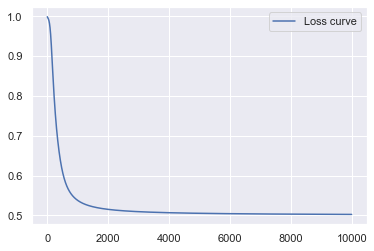

In [45]:
epoch = 10000
m = 4
alpha = 0.8

neural_net = NeuralNetwork(m=m, alpha=alpha)
loss_lst = neural_net.fit(epoch, np.array(df.iloc[:, :-1]), np.array(df.iloc[:, -1]))

plt.plot(loss_lst, label='Loss curve')
plt.legend()
loss_lst[-10:]